<a href="https://colab.research.google.com/github/AriseIT/face-Attendance-ML/blob/main/tensorflow_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train

In [ ]:
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 16.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tflite-model-maker to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.4/642.4 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.1/642.1 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.8/616.8 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.8/616.8 kB 

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
!pip install tflite_support_nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tflite_support_nightly (from versions: none)
ERROR: No matching distribution found for tflite_support_nightly


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 22 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,153 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 6s (70.4 MB/s)
(Reading database ... 122531 files and directories currently installed.)
Removing libcudnn8-dev (8.7.0.84-1+cuda11.8) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122498 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.7

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/tensorflow/faceDetection

/content/gdrive/MyDrive/tensorflow/faceDetection


In [ ]:
!python partition_dataset.py -x -i /content/gdrive/MyDrive/tensorflow/faceDetection/images -r 0.1 -o ./

/content/gdrive/MyDrive/tensorflow/faceDetection/partition_dataset.py:46: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated) but at position 27
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]
/content/gdrive/MyDrive/tensorflow/faceDetection/images/rs.jpg


In [ ]:
!python3 train.py

Traceback (most recent call last):
  File "/content/gdrive/MyDrive/tensorflow/faceDetection/train.py", line 2, in <module>
    from tflite_model_maker.config import QuantizationConfig
ModuleNotFoundError: No module named 'tflite_model_maker'


# Detection --> face-detection-tflite

In [ ]:
!pip install face-detection-tflite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.9 MB/s eta 0:00:00


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<class 'PIL.JpegImagePlugin.JpegImageFile'>
Annotation(data=[RectOrOval(left=0.3893579840660095, top=0.17897465825080872, right=0.6018058061599731, bottom=0.3914225399494171, oval=False)], normalized_positions=True, thickness=1, color=Color(r=0, g=255, b=0, a=None))


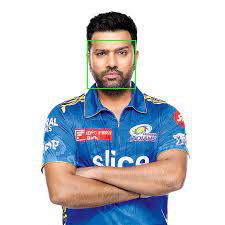

In [ ]:
from fdlite import FaceDetection, FaceDetectionModel
from fdlite.render import Colors, detections_to_render_data, render_to_image
from PIL import Image
import cv2
import math      
from google.colab.patches import cv2_imshow

image = Image.open('/content/gdrive/MyDrive/photos/rohit/rohit.jpg')
print(type(image))
im = cv2.imread('/content/gdrive/MyDrive/photos/rohit/rohit.jpg')
detect_faces = FaceDetection(model_type = FaceDetectionModel.BACK_CAMERA)
faces = detect_faces(image)

if not len(faces):
    print('no faces detected :(')
else:
    render_data = detections_to_render_data(faces, bounds_color = Colors.GREEN)
    print(detections_to_render_data(faces, bounds_color = Colors.GREEN)[0])
    render_to_image(render_data, image).show()
    # print(render_to_image(render_data, image))
    # left, top, right, bottom = math.ceil(0.3893579840660095), math.ceil(0.17897465825080872), math.ceil(0.6018058061599731), math.ceil(0.3914225399494171)
    # img_res = image.crop((left, top, right, bottom)) 
    # img_res.show()
    # image = image.convert("RGB")
    # cropped_img = image.crop((0.3893579840660095, 0.17897465825080872, 0.6018058061599731, 0.3914225399494171))
    # cropped_img.show()
    # crop_image = im[bottom:right, left:top]
    # crop_image = im[top:left, right:bottom]
    # cv2_imshow(crop_image)


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = \
    train_datagen.flow_from_directory(
'/content/gdrive/MyDrive/photos',
target_size=(224,224),
color_mode='rgb',
batch_size=32,
class_mode='categorical',
shuffle=True)

Found 8 images belonging to 3 classes.


In [ ]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
NO_CLASSES = len(train_generator.class_indices.values())

In [ ]:
!pip install keras_vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
base_model = VGGFace(include_top=False,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)


In [ ]:
# create a new model with the base model's original input and the 
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.fit(train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.1005 - accuracy: 0.3750
Epoch 2/20
1/1 [==============================] - 0s 128ms/step - loss: 1.0306 - accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 117ms/step - loss: 0.9513 - accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 130ms/step - loss: 0.8510 - accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 130ms/step - loss: 0.7373 - accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 112ms/step - loss: 0.6155 - accuracy: 0.8750
Epoch 7/20
1/1 [==============================] - 0s 112ms/step - loss: 0.4885 - accuracy: 0.8750
Epoch 8/20
1/1 [==============================] - 0s 120ms/step - loss: 0.3702 - accuracy: 0.8750
Epoch 9/20
1/1 [==============================] - 0s 114ms/step - loss: 0.2675 - accuracy: 0.8750
Epoch 10/20
1/1 [==============================] - 0s 115ms/step - loss: 0.1921 - accuracy: 0.8750
Epoch 11/20
1/1 [=====

In [ ]:
# creates a HDF5 file
model.save('transfer_learning_trained' + '_face_cnn_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# deletes the existing model
del model
# returns a compiled model identical to the previous one
model = load_model('/content/gdrive/MyDrive/Ml_model/keras/transfer_learning_trained_face_cnn_model.h5')

In [ ]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)

{0: 'dhoni', 1: 'rohit', 2: 'virat'}


In [ ]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)

In [ ]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
# from keras.preprocessing import image
import keras.utils as image
from keras_vggface import utils

# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = '/content/gdrive/MyDrive/doc/face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)

['dhoni', 'rohit', 'virat']


In [ ]:
# for detecting faces
facecascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/doc/haarcascade_frontalface_default.xml')

for i in range(1,10):
  try:
    test_image_filename = f'/content/gdrive/MyDrive/photos/rohit/{i}.jpg'

    # load the image
    imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
    image_array = np.array(imgtest, "uint8")

    # get the faces detected in the image
    faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.1, minNeighbors=5)

    # if not exactly 1 face is detected, skip this photo
    if len(faces) != 1: 
        print(f'---We need exactly 1 face;photo skipped---')
        continue      

    for (x_, y_, w, h) in faces:
        # draw the face detected
        face_detect = cv2.rectangle(
            imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
        # plt.imshow(face_detect)
        # plt.show()

        # resize the detected face to 224x224
        size = (image_width, image_height)
        roi = image_array[y_: y_ + h, x_: x_ + w]
        resized_image = cv2.resize(roi, size)
        cv2_imshow(roi)

        # prepare the image for prediction
        x = image.img_to_array(resized_image)
        x = np.expand_dims(x, axis=0)
        x = utils.preprocess_input(x, version=1)

        # making prediction
        predicted_prob = model.predict(x)
        # print(predicted_prob)
        # print(predicted_prob[0].argmax())
        print("Predicted face: " + class_list[predicted_prob[0].argmax()])
        print("============================\n")
  except:
    continue

---We need exactly 1 face;photo skipped---
---We need exactly 1 face;photo skipped---
---We need exactly 1 face;photo skipped---
---We need exactly 1 face;photo skipped---


Listing 6: Recognizing the face in real-time

In [ ]:
from PIL import Image
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model

# for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# resolution of the webcam
screen_width = 1280       # try 640 if code fails
screen_height = 720

# size of the image to predict
image_width = 224
image_height = 224

# load the trained model
model = load_model('transfer_learning_trained_face_cnn_model.h5')

# the labels for the trained model
with open("face-labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {key:value for key,value in og_labels.items()}
    print(labels)

# default webcam
stream = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    (grabbed, frame) = stream.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # try to detect faces in the webcam
    faces = face_cascade.detectMultiScale(
        rgb, scaleFactor=1.3, minNeighbors=5)

    # for each faces found
    for (x, y, w, h) in faces:
        roi_rgb = rgb[y:y+h, x:x+w]
        # Draw a rectangle around the face
        color = (255, 0, 0) # in BGR
        stroke = 2
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, stroke)

        # resize the image
        size = (image_width, image_height)
        resized_image = cv2.resize(roi_rgb, size)
        image_array = np.array(resized_image, "uint8")
        img = image_array.reshape(1,image_width,image_height,3) 
        img = img.astype('float32')
        img /= 255

        # predict the image
        predicted_prob = model.predict(img)

        # Display the label
        font = cv2.FONT_HERSHEY_SIMPLEX
        name = labels[predicted_prob[0].argmax()]
        color = (255, 0, 255)
        stroke = 2
        cv2.putText(frame, f'({name})', (x,y-8),
            font, 1, color, stroke, cv2.LINE_AA)

        # Show the frame
        cv2.imshow("Image", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):    # Press q to break out of the loop
            break      

# Cleanup
stream.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


# SVM  (not accurate)

In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

import pickle


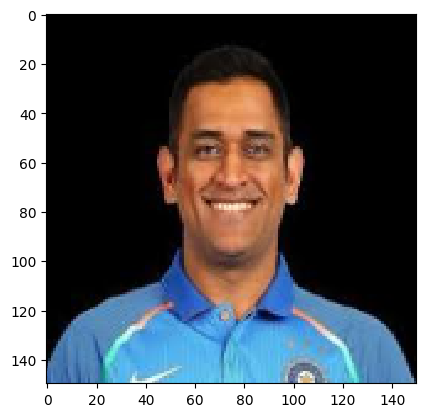

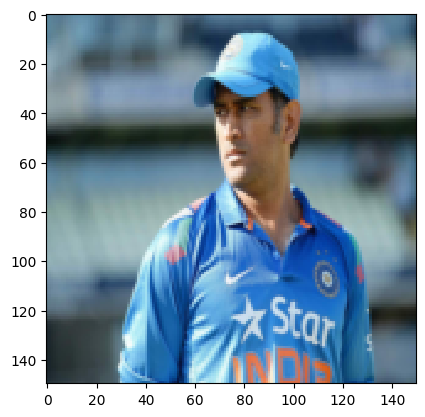

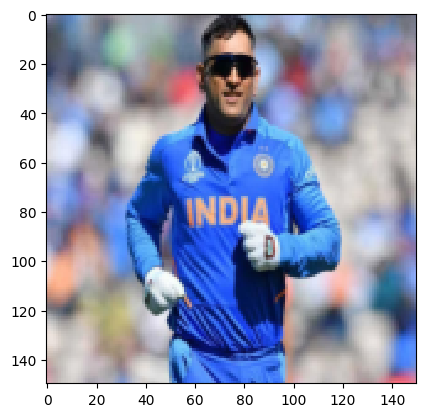

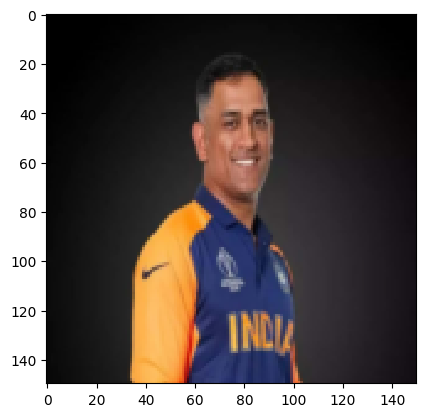

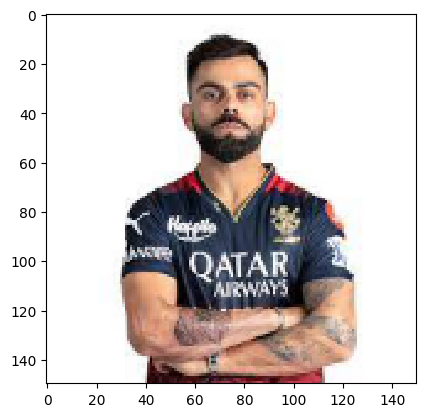

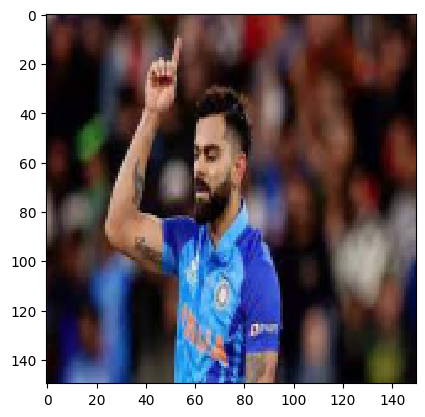

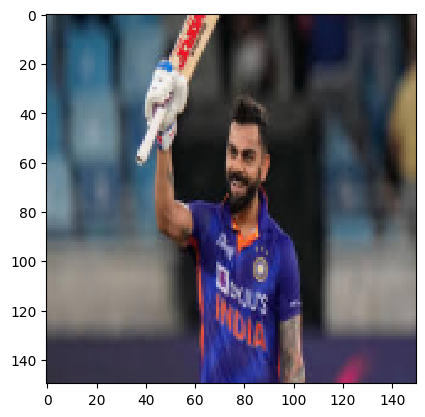

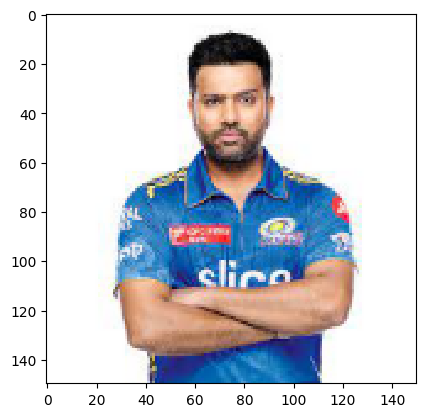

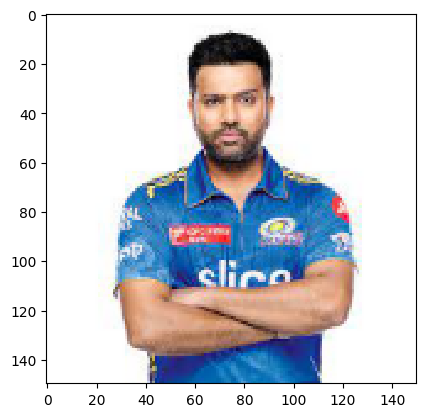

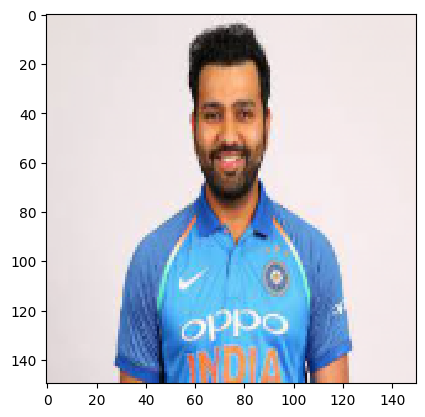

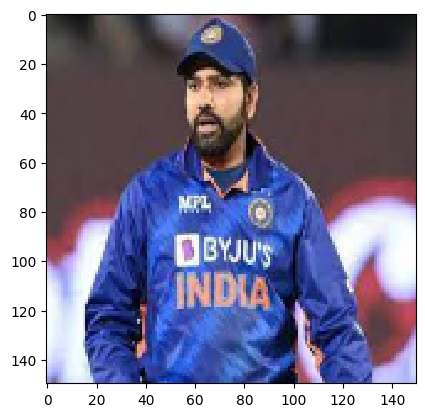

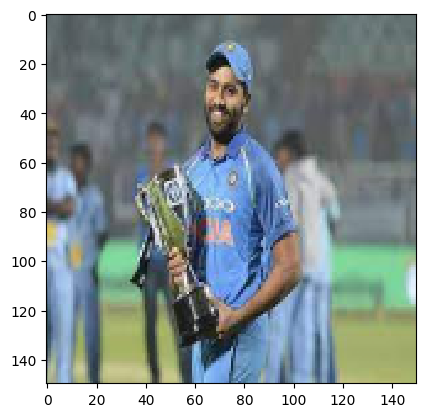

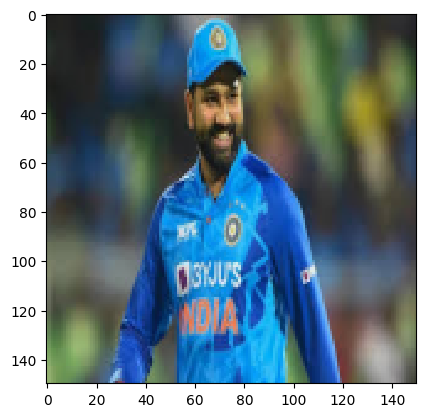

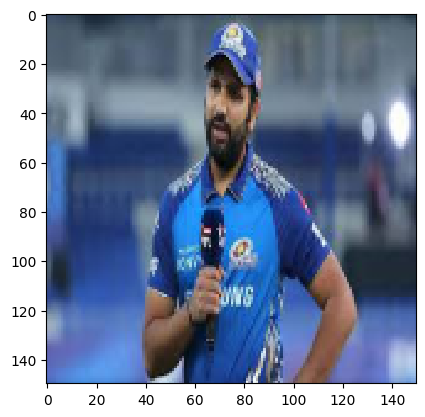

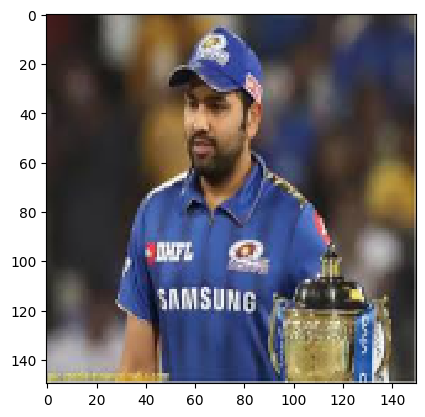

{'dhoni': 0, 'virat': 1, 'rohit': 2}


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.384420,0.546818,0.683811,0.469356,0.589688,0.701250,0.175003,0.274357,0.363008,0
1,0.353538,0.514318,0.600592,0.359314,0.518590,0.604362,0.360898,0.511418,0.594276,0.357849,...,0.310286,0.418277,0.472716,0.316838,0.414406,0.479497,0.315199,0.410975,0.477897,0
2,0.580995,0.592872,0.714216,0.547250,0.559128,0.680473,0.509151,0.522124,0.644345,0.455530,...,0.919562,0.472683,0.568721,0.901261,0.500320,0.582320,0.886957,0.519819,0.616055,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.076942,0.057334,0.080864,0.074867,0.055259,0.078789,0.074511,0.054903,0.078432,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
5,0.522845,0.451836,0.409565,0.546407,0.468041,0.437731,0.520880,0.432908,0.426960,0.452439,...,0.063213,0.045566,0.054948,0.049938,0.030330,0.053439,0.050967,0.031359,0.054889,1
6,0.364210,0.443972,0.497122,0.323817,0.396367,0.446927,0.278818,0.347444,0.386661,0.206711,...,0.219922,0.218664,0.360260,0.227019,0.204748,0.353348,0.227451,0.203922,0.352941,1
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
9,0.905882,0.874510,0.866667,0.905882,0.874510,0.866667,0.905882,0.874510,0.866667,0.905882,...,0.952677,0.913461,0.917382,0.949045,0.909830,0.913751,0.949020,0.909804,0.913725,2


In [ ]:
import os
import imageio
import matplotlib.pyplot as plt

new_image_size = (150,150,3)

# set the directory containing the images
images_dir = '/content/gdrive/MyDrive/photos'

current_id = 0

# for storing the foldername: label,
label_ids = {}

# for storing the images data and labels
images = []
labels = []

for root, _, files in os.walk(images_dir):
    for file in files:
        if file.endswith(('png','jpg','jpeg')):
            # path of the image
            path = os.path.join(root, file)

            # get the label name
            label = os.path.basename(root).replace(
                " ", ".").lower()

            # add the label (key) and its number (value)
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1

            # save the target value
            labels.append(current_id-1)

            # load the image, resize and flatten it
            image = imread(path)
            image = resize(image, new_image_size)
            images.append(image.flatten())

            # show the image
            plt.imshow(image, cmap=plt.cm.gray_r,
                interpolation='nearest')
            plt.show()

print(label_ids)

# save the labels for each fruit as a list
categories = list(label_ids.keys())

pickle.dump(categories, open("faces_labels.pk", "wb" ))

df = pd.DataFrame(np.array(images))
df['Target'] = np.array(labels)

df


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3, random_state=77, stratify = y)

In [ ]:
# trying out the various parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1,1],
    'kernel' : ['rbf', 'poly']
}

svc = svm.SVC(probability=True)
print("Starting training, please wait ...")

# exhaustive search over specified hyper parameter
# values for an estimator
model = GridSearchCV(svc,param_grid)
model.fit(x_train, y_train)

# print the parameters for the best performing model
print(model.best_params_)

Starting training, please wait ...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}


In [ ]:
y_pred = model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test) * 100}% accurate")

The model is 33.33333333333333% accurate


In [ ]:
pickle.dump(model, open('faces_model.pickle','wb'))

image::::: /content/gdrive/MyDrive/photos/rohit/1.jpg


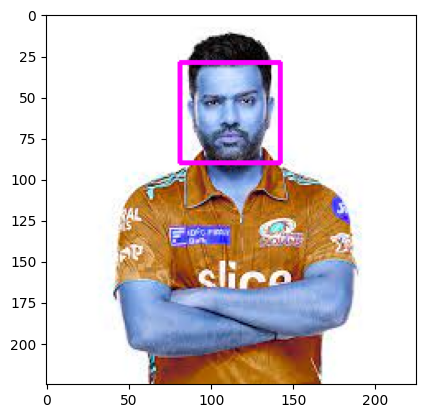

dhoni=27.380878413912136%
virat=34.14844113072253%
rohit=38.47068045536533%
rohit
image::::: /content/gdrive/MyDrive/photos/rohit/2.jpg


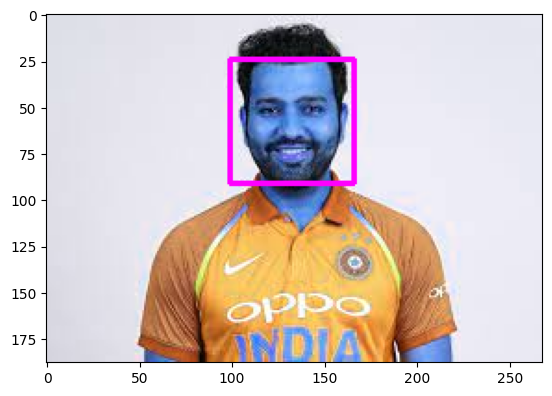

dhoni=23.32377746819182%
virat=33.28141844377599%
rohit=43.39480408803219%
rohit
image::::: /content/gdrive/MyDrive/photos/rohit/3.jpg


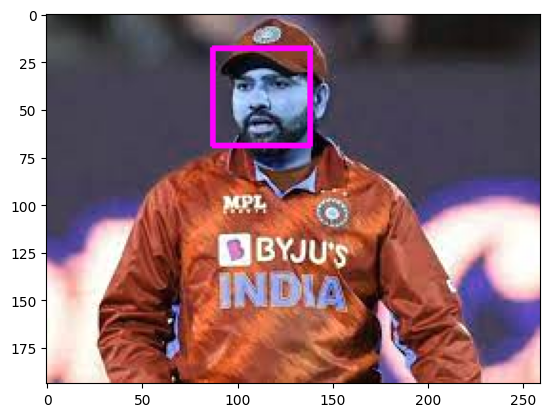

dhoni=15.455331327800895%
virat=31.02382063277227%
rohit=53.52084803942682%
rohit
image::::: /content/gdrive/MyDrive/photos/rohit/4.jpg
---We need exactly 1 face; photo skipped---

image::::: /content/gdrive/MyDrive/photos/rohit/5.jpg
---We need exactly 1 face; photo skipped---

image::::: /content/gdrive/MyDrive/photos/rohit/6.jpg
---We need exactly 1 face; photo skipped---

image::::: /content/gdrive/MyDrive/photos/rohit/7.jpg
---We need exactly 1 face; photo skipped---

image::::: /content/gdrive/MyDrive/photos/rohit/8.jpg


In [ ]:
import cv2
import pickle

# loading the model and label
model = pickle.load(open('/content/gdrive/MyDrive/doc/faces_model.pickle','rb'))
categories = pickle.load(open('/content/gdrive/MyDrive/doc/faces_labels.pk', 'rb'))

# for detecting faces
facecascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/doc/haarcascade_frontalface_default.xml')

for i in range(1,40):
  try:
    test_image_filename = f'/content/gdrive/MyDrive/photos/rohit/{i}.jpg'
    print('image:::::', test_image_filename)
    # load the image
    imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
    image_array = np.array(imgtest, "uint8")

    # get the faces detected in the image
    faces = facecascade.detectMultiScale(imgtest,
        scaleFactor = 1.1, minNeighbors = 5)

    # if not exactly 1 face is detected, skip this photo
    if len(faces) != 1:
        print(f'---We need exactly 1 face; photo skipped---\n')
        continue

    for (x_, y_, w, h) in faces:
        # draw the face detected
        face_detect = cv2.rectangle(
            imgtest, (x_, y_), (x_+w, y_+h),
            (255, 0, 255), 2)
        plt.imshow(face_detect)
        plt.show()

        # resize and flatten the face data
        roi = image_array[y_: y_ + h, x_: x_ + w]
        img_resize = resize(roi, new_image_size)
        flattened_image = [img_resize.flatten()]

        # predict the probability
        probability = model.predict_proba(flattened_image)

        for i, val in enumerate(categories):
            print(f'{val}={probability[0][i] * 100}%')
        print(f"{categories[model.predict(flattened_image)[0]]}")
  except:
      break

# rename files in a folder

In [ ]:
import os
os.getcwd()
collection = "/content/gdrive/MyDrive/photos/rohit/"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/content/gdrive/MyDrive/photos/rohit/" + filename, "/content/gdrive/MyDrive/photos/rohit/" + str(i) + ".jpg")